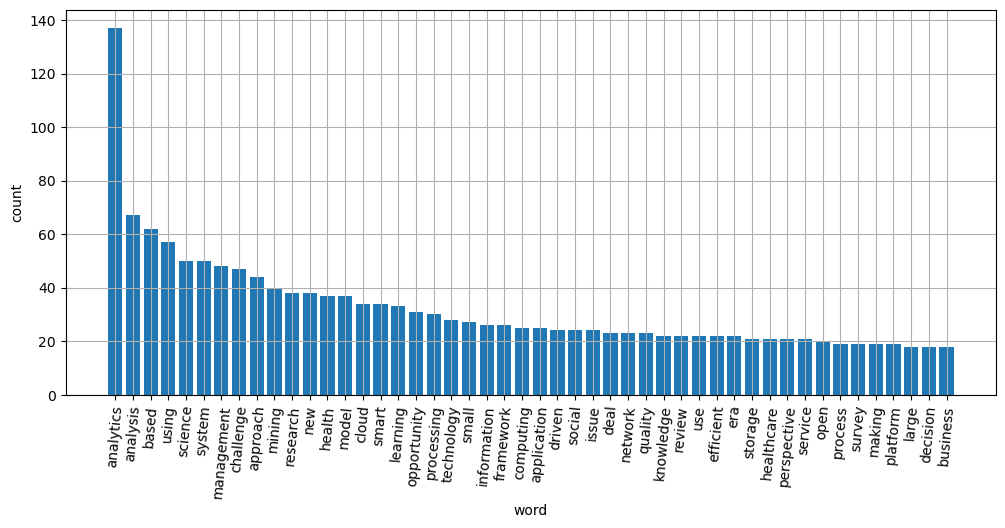

In [1]:
from glob import glob
import pandas as pd
import re


all_files = glob('/Users/handrakes/bigdata/myCabinetExcelData/*.xls')

df1 = pd.DataFrame({'ID' : ['a_1', 'a_2', 'a_3'], 'COUNT' : [5, 3, 4]})
df2 = pd.DataFrame({'ID' : ['b_1', 'b_2'], 'COUNT' : [20, 30]})
df3 = pd.DataFrame({'ID' : ['c_1', 'c_2', 'c_3'], 'COUNT' : [17, 18, 20]})

df_list = [df1, df2, df3]
df_all = pd.concat(df_list, ignore_index=True) 

all_files_data = []

for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)

    
all_files_data_concat = pd.concat(all_files_data, axis = 0, ignore_index = True)
all_title = all_files_data_concat['제목']

import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

stopWords = set(stopwords.words("english"))

lemma = WordNetLemmatizer()

words = []
for title in all_title:
    EnWords = re.sub("[^a-zA-Z]+", " ", str(title)) #알파벳이 아닌 문자 제거
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)
    
words2 = []
for title in all_title:
    EnWords = re.sub("[^a-zA-Z]+", " ", str(title)) 
    #print(EnWords)
    EnWordsToken = word_tokenize(EnWords.lower()) 
    #print(EnWordsToken)
    EnWordsTokenStop = [] 
    for w in EnWordsToken:
        if w not in stopWords: 
            EnWordsTokenStop.append(w)
    #print(EnWordsTokenStop)
    EnWordsTokenStopLemma = [] 
    for w in EnWordsTokenStop:
        EnWordsTokenStopLemma.append(lemma.lemmatize(w))
    #print(EnWordsTokenStopLemma)
    words2.append(EnWordsTokenStopLemma) 
    
from functools import reduce

words3 = reduce(lambda x,y : x+ y, words)

from collections import Counter
# 리스트에 있는 단어별로 출현 횟수를 계산하여 딕셔너리 객체인 count를 생성 
count = Counter(words3)

word_count = dict()
for tag, counts in count.most_common(50):
    if(len(str(tag)) > 1):
        word_count[tag] = counts
        
sorted_Keys = sorted(word_count, key=word_count.get, reverse = True)

sorted_Values = sorted(word_count.values(), reverse=True)

import matplotlib.pyplot as plt
plt.figure(figsize = (12,5))

word_count_data = word_count.copy()
word_count_data.pop('big')
word_count_data.pop('data')

sorted_Keys_data = sorted(word_count_data, key = word_count_data.get, reverse = True)
sorted_Values_data = sorted(word_count_data.values(), reverse = True)

plt.bar(range(len(word_count_data)), sorted_Values_data)
plt.xticks(range(len(word_count_data)), list(sorted_Keys_data), rotation= 85)
plt.xlabel('word')
plt.ylabel('count')
plt.grid(visible = True)

plt.show()

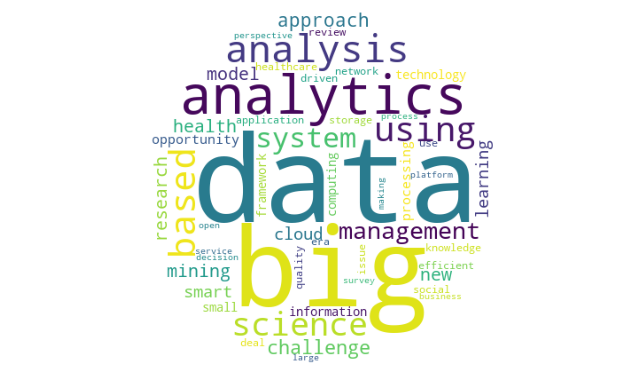

In [2]:
from wordcloud import WordCloud 
#import matplotlib.pyplot as plt 

import numpy as np
from PIL import *
cand_mask=np.array(Image.open('/Users/handrakes/bigdata/sample.jpg'))


wc = WordCloud(background_color='white', width=800, height=600, mask = cand_mask)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize=(8,8)) 
plt.imshow(cloud) # 이미지 출력함수 plt.axis('off') # 축과 라벨 이름 제거 
plt.axis('off')
plt.show()

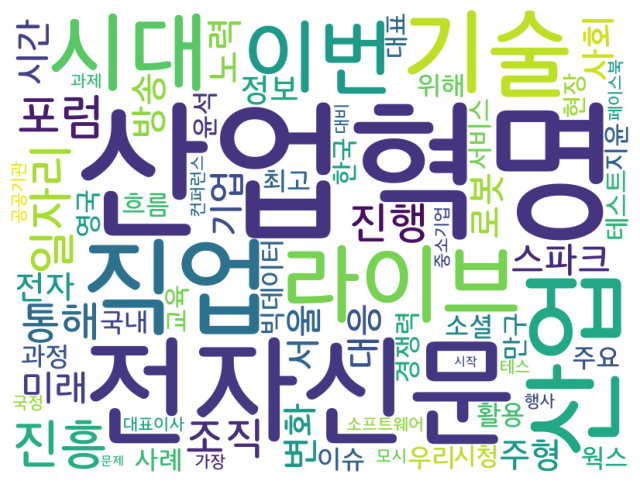

In [3]:
import json
import re
from konlpy.tag import Okt
from collections import Counter
from matplotlib import rc
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib import font_manager,rc

inputFileName = '/Users/handrakes/bigdata/etnews.kr_facebook_2016-01-01_2018-08-01_4차 산업혁명.json' 
with open(inputFileName, 'r', encoding='utf-8') as in_json:
    data = json.load(in_json) 

message = ""
for item in data:
    if 'message' in item.keys():
        message += re.sub(r'[^\w]',' ', item['message'])
        
okt = Okt()
message_N = okt.nouns(message)

count = Counter(message_N)

korean_count = dict()
for tag, counts in count.most_common(80):
    if(len(str(tag)) > 1):
        korean_count[tag] = counts
        
        
font_path = "/Users/handrakes/bigdata/korean.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
plt.rc('font', family = font_name)

wc = WordCloud(font_path, background_color='white', width=800, height=600) 
cloud = wc.generate_from_frequencies(korean_count)
plt.figure(figsize=(8,8)) 
plt.imshow(cloud) 
plt.axis('off') 
plt.show()

cloud.to_file(inputFileName + '_cloud.jpg')